# Specify Unity environment file

In [7]:
# Specify the Unity environment as per platform
file_name = "./Banana.app"                         # Mac OSX
#file_name = "./Banana_Linux/Banana.x86"            # Linux 32 bit
#file_name = "./Banana_Linux/Banana.x86_64"         # Linux 64 bit
#file_name = "./Banana_Windows_x86/Banana.exe"      # Windows 32 bit
#file_name = "./Banana_Windows_x86_64/Banana.exe"   # Windows 64 bit

# Create the environment

In [ ]:
import time
import collections
import numpy as np
from matplotlib import pyplot as plt
from unityagents import UnityEnvironment
from agents import DQNAgent

# create environment
env = UnityEnvironment(file_name)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

ERROR:root:Exception calling application: Ran out of input
Traceback (most recent call last):
  File "/Users/aritra/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/Users/aritra/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "/Users/aritra/opt/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
EOFError: Ran out of input


# Create a DQN agent

In [ ]:
# DQN agent hyperparameters
BUFFERSIZE = 1000000    # Experience buffer size
GAMMA = 0.995           # Discount factor
EPSILON = 0.9           # Epsilon parameter for selecting action
DECAY = 1e-5            # Epsilon decay rate
EPMIN = 0.1             # Minimum value of epsilon
MINIBATCHSIZE = 64      # Batch size for sampling from experience replay
LEARNRATE = 1e-4        # Learn rate of Q network
EPOCHS = 1              # Number of epochs to train
UPDATEFREQ = 5          # Number of agent steps until target Q network weights are updated
TAU = 1e-3              # Target network update factor
ALPHA = 0.4             # Priority exponent
BETA = 0.6              # Importance sampling exponent

# training options
MAX_EPISODES = 3000     # Maximum number of training episodes
AVG_WINDOW = 100        # Window length for calculating score averages
MAX_STEPS_PER_EPISODE = 1000    # Maximum agent steps per episode

# create DQN agent
osize = len(env_info.vector_observations[0])
asize = brain.vector_action_space_size
seed = 0
agent = DQNAgent(osize,asize,seed,BUFFERSIZE,GAMMA,EPSILON,DECAY,EPMIN,MINIBATCHSIZE,LEARNRATE,EPOCHS,UPDATEFREQ,TAU,ALPHA,BETA)


# Train the agent

In [ ]:
# log scores
reward_log = []
avg_log = []
avg_window = collections.deque(maxlen=AVG_WINDOW)

# Train the agent
for ep_count in range(1,MAX_EPISODES):

    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]
    
    ep_reward = 0
    
    for t in range(1,MAX_STEPS_PER_EPISODE):
        # sample action from the current policy
        action = int(agent.get_action(state))
        
        # step the environment
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0] 
        done = env_info.local_done[0]
        
        # step the agent
        update = True if ep_count % UPDATEFREQ == 0 else False
        agent.step(state,action,reward,next_state,done,update)
        
        state = next_state
        ep_reward += reward
        
        # terminate if done
        if done:
            break
    
    # print training progress
    #avg_reward = np.sum(reward_log[max(ep_count-AVG_WINDOW-1,0):ep_count])/(min(ep_count,AVG_WINDOW))
    avg_window.append(ep_reward)
    avg_reward = np.mean(avg_window)
    avg_log.append(avg_reward)
    reward_log.append(ep_reward)
    print('Episode: {} \tEpisode Steps: {} \tEpisode Reward: {:8.4f} \tAverage Reward: {:8.4f}'.format(ep_count,t,ep_reward,avg_reward))
    
    # check if env is solved
    if avg_log[ep_count-1] >= 13:
        break
    
print('Training complete. Final score: {:.2f}'.format(avg_score[ep_count]))

# Close environment
env.close()


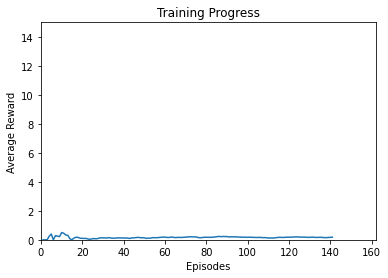

In [6]:
# plot score history
plt.ion()
fig, ax = plt.subplots()
ax.set_title("Training Progress")
ax.set_xlabel("Episodes")
ax.set_ylabel("Average Reward")
ax.set_xlim([0, ep_count+20])
ax.set_ylim([0, 15])
ax.plot(range(1,ep_count),avg_log)
plt.show()